### Time Series - Pandas

We will first look into developing a datetime object with pandas and datetime module

In [249]:
# importing libraries
from datetime import datetime
import pandas as pd 
import numpy as np 
%matplotlib inline

In [250]:
# Creating variables for  datetime objects
my_year = 2023
my_month = 2
my_date = 22
my_hour = 9 
my_min = 20 
my_sec = 30

In [251]:
# creating the datetime object
my_date = datetime(my_year,my_month,my_date,my_hour,my_min,my_sec)
my_date

datetime.datetime(2023, 2, 22, 9, 20, 30)

In [252]:
# Typecasting
print(type(my_date))

<class 'datetime.datetime'>


In [253]:
# we can also extract , day , month , year etc from the date time object
print(f'my year is {my_date.year}')
print(f'my month is {my_date.month}')
print(f'my day is {my_date.day}')
print(f'my hour is {my_date.hour}')

my year is 2023
my month is 2
my day is 22
my hour is 9


In [254]:
# datetime indexing with pandas 
# here we are printing 10 data points with day level frequency and the ns means nano second level precision
print(pd.date_range('2023-01-01',periods=10,freq='D'))

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')


In [255]:
# converting string/lists into datetime object/index with pandas by providing formats
print('in here we are converting the data where the dates are given with consistent delimiter')
print(pd.to_datetime(['2/1/2019','3/1/2019'],format='mixed'))
print('in here we are converting the data where the dates are given with mixed delimiter')
print(pd.to_datetime(['2--1--2019','3/1/2019'],format='mixed'))

in here we are converting the data where the dates are given with consistent delimiter
DatetimeIndex(['2019-02-01', '2019-03-01'], dtype='datetime64[ns]', freq=None)
in here we are converting the data where the dates are given with mixed delimiter
DatetimeIndex(['2019-02-01', '2019-03-01'], dtype='datetime64[ns]', freq=None)


In [256]:
# developing a time series data with time data as index 
''' Index development ''' 
idx = pd.date_range('2023-01-01',periods = 10 , freq='D')
data = np.random.randn(10,2)
cols = ['A','B']
df = pd.DataFrame(data,index=idx,columns=cols)
df.head()

,A,B
2023-01-01,1.054223,1.759241
2023-01-02,-0.682454,0.164002
2023-01-03,1.075037,1.639836
2023-01-04,-0.389997,0.759911
2023-01-05,0.107490,0.913419


### Time Series - Numpy

Now let's look into developing Datetime objet with numpy

In [257]:
import numpy as np

In [258]:
# first let's declare a numpy array as datetime object , in the output the D that is shown stands for day level precision of our data , we can change it to year/month as well
np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64')

array(['2023-10-15', '2023-10-19', '2023-10-18'], dtype='datetime64[D]')

In [259]:
# changing precision level to year/ Month
print(np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64[Y]'))
print(np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64[M]'))

['2023' '2023' '2023']
['2023-10' '2023-10' '2023-10']


In [260]:
# although we didn't provide hour in our data , numpy takes a default value of it if we try to call it with hour as below . h needs to be in small letter
print(np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64[h]'))

['2023-10-15T00' '2023-10-19T00' '2023-10-18T00']


In [261]:
# Now let's have a look on how we can create continuous date wise data with given interval
# just like above , we have to specify that on which input we are arrange the dates
# suppose we want a range of dates in that case after specifying the number of dates we will provide D as an argument in dtype , for M in months etc etc
print(np.arange('2023-01-01','2023-06-01',7,dtype='datetime64[D]'))
print(np.arange('2023-01-01','2024-06-01',1,dtype='datetime64[M]'))
print(np.arange('2012-01-01','2024-06-01',2,dtype='datetime64[Y]'))
print(np.arange('2023-01-01','2023-01-02',2,dtype='datetime64[h]'))

['2023-01-01' '2023-01-08' '2023-01-15' '2023-01-22' '2023-01-29'
 '2023-02-05' '2023-02-12' '2023-02-19' '2023-02-26' '2023-03-05'
 '2023-03-12' '2023-03-19' '2023-03-26' '2023-04-02' '2023-04-09'
 '2023-04-16' '2023-04-23' '2023-04-30' '2023-05-07' '2023-05-14'
 '2023-05-21' '2023-05-28']
['2023-01' '2023-02' '2023-03' '2023-04' '2023-05' '2023-06' '2023-07'
 '2023-08' '2023-09' '2023-10' '2023-11' '2023-12' '2024-01' '2024-02'
 '2024-03' '2024-04' '2024-05']
['2012' '2014' '2016' '2018' '2020' '2022']
['2023-01-01T00' '2023-01-01T02' '2023-01-01T04' '2023-01-01T06'
 '2023-01-01T08' '2023-01-01T10' '2023-01-01T12' '2023-01-01T14'
 '2023-01-01T16' '2023-01-01T18' '2023-01-01T20' '2023-01-01T22']


#### Time Series - Resampling

We will now perform some resampling with our data which is similar to groupby function

In [262]:
# reading the data and setting the date column as index at once
df = pd.read_excel('.\Data\daily_datewise_bihar.xlsx',index_col='primary_lifting_date')
df1 = df.copy()
df.head()

,primary_lifting
primary_lifting_date,
2019-04-01,1.00
2019-04-02,1.00
2019-04-03,25.05
2019-04-04,1.00
2019-04-05,65.21


In [263]:
# resampling the data into monthly data and the aggregation function will be sum 
df.resample(rule='M').sum().head()

,primary_lifting
primary_lifting_date,
2019-04-30,1446.771
2019-05-31,1742.740
2019-06-30,1757.635
2019-07-31,1646.580
2019-08-31,2105.713


In [264]:
#resampling the data into yearly data and the aggregation function will be sum 
df.resample(rule='Y').sum().head()

,primary_lifting
primary_lifting_date,
2019-12-31,18058.335
2020-12-31,28628.593
2021-12-31,34369.621
2022-12-31,39992.407
2023-12-31,29747.576


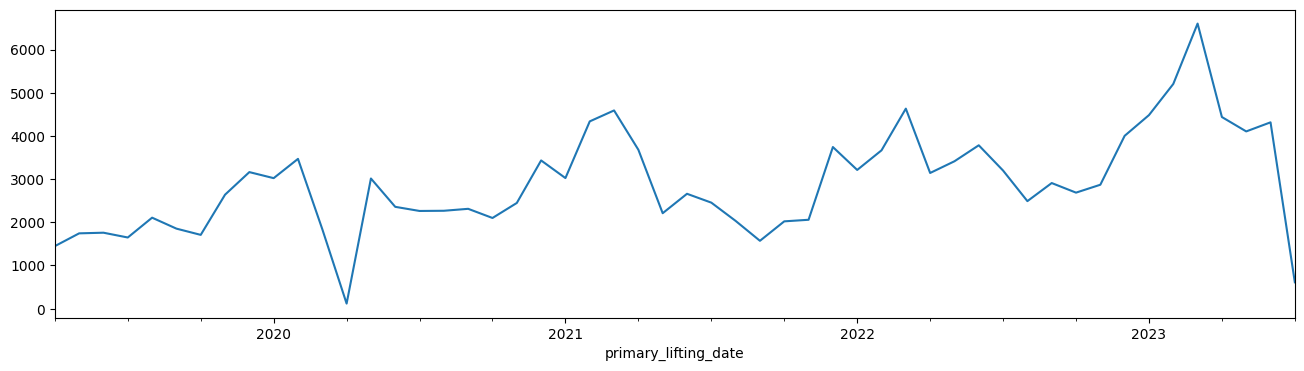

In [265]:
# plotting the daily data with matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
df['primary_lifting'].resample('M').sum().plot.line(figsize=(16,4))
plt.show()

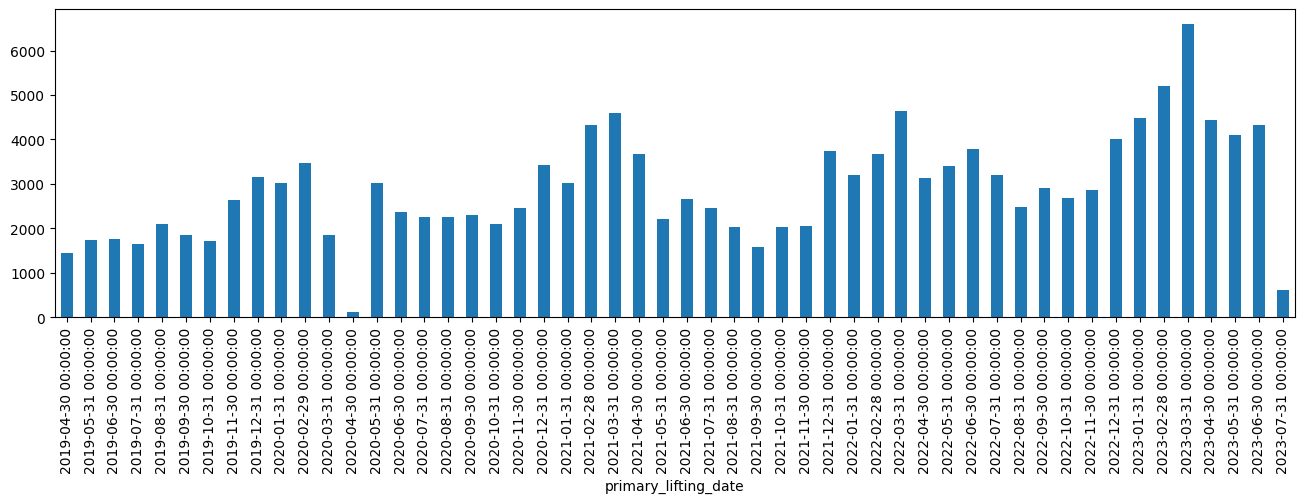

In [266]:
df['primary_lifting'].resample('M').sum().plot.bar(figsize=(16,4))
plt.show()

#### Rolling Window

The rolling feature takes specific window into consideration. It can be a 7 day , 30 day , 60 day window as per choice. Aggregation function like mean , sum , standard deviation etc works on this rolling window parameter. For example 

    -   We have a data for 365 days and each day sale
    -   If we consider a rolling mean with window size as 7 , it means every 7 days average is being taken into consderation from the start
    -   As the window size is 7 hence (7-1) = 6 values will be present as nan in the begining of the data. from 7th data point we will be able to see the average for last 7 days
    -   With window size as 30 the same concept above will be applicable with first to 29th data point being nan.

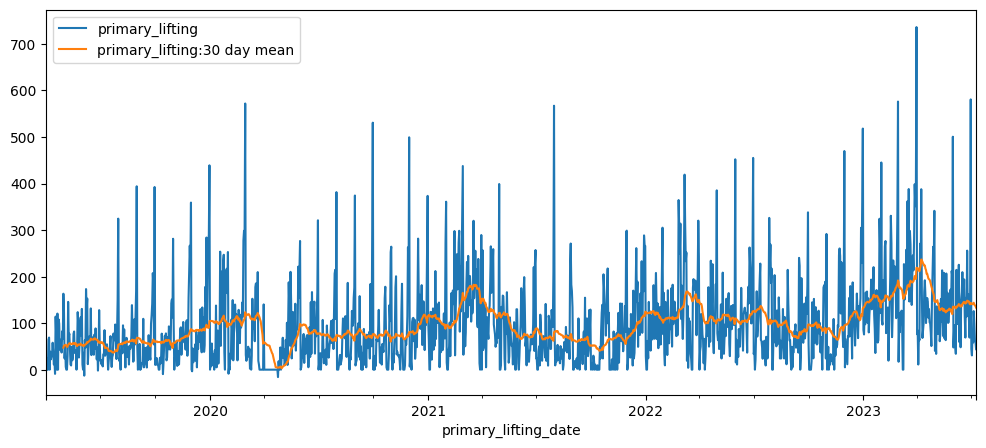

In [267]:
# let's plot a 30 day rolling average window as a new column and plot the same along with original data

df['primary_lifting:30 day mean'] = df['primary_lifting'].rolling(window=30).mean()
df[['primary_lifting','primary_lifting:30 day mean']].plot(figsize=(12,5))
plt.show()

#### Expanding

Unlike rolling , expanding doesn't take a specific window into considertion while plotting the data , instead it create specific data points and before those data points every value that's present , exapnding calculate the aggregate value of them as per our given aggregation function

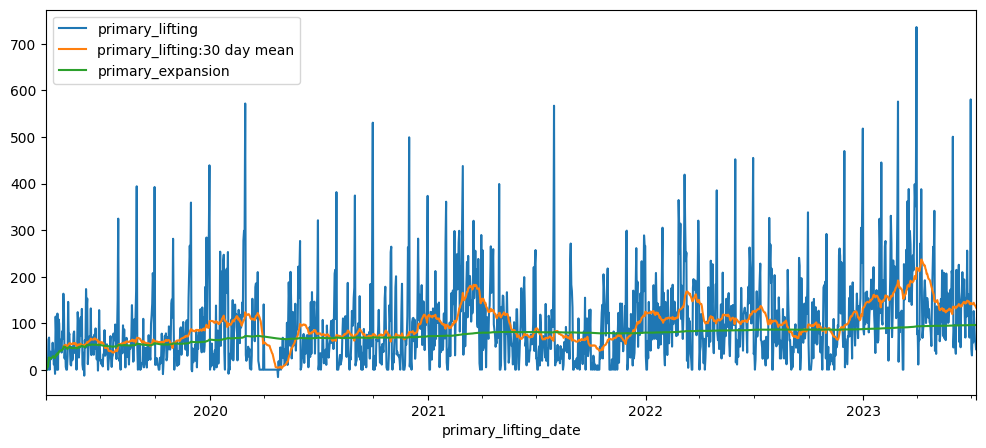

In [268]:
df['primary_lifting:30 day mean'] = df['primary_lifting'].rolling(window=30).mean()
df['primary_expansion'] = df['primary_lifting'].expanding().mean()
df[['primary_lifting','primary_lifting:30 day mean','primary_expansion']].plot(figsize=(12,5))
plt.show()

In [269]:
# let's visualize our data with title , xlabel and ylabel
title = 'Title'
xlabel = 'Xlabel'
ylabel = 'Ylabel'

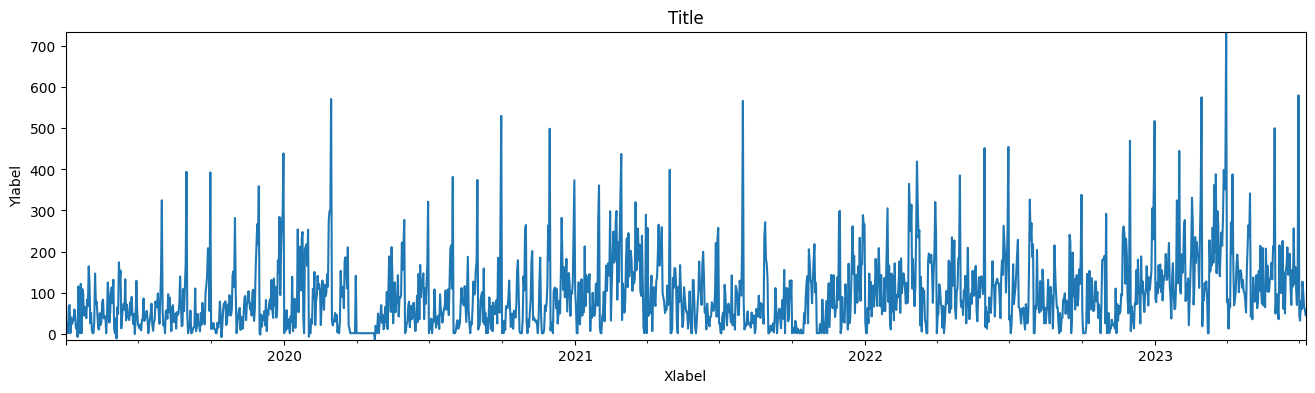

In [270]:
# setting up the axis first to assign x and ylabel to it , autoscaling removes any white space above and below the extreme data point in both x and y axis 
ax = df1['primary_lifting'].plot(figsize=(16,4),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel) ;

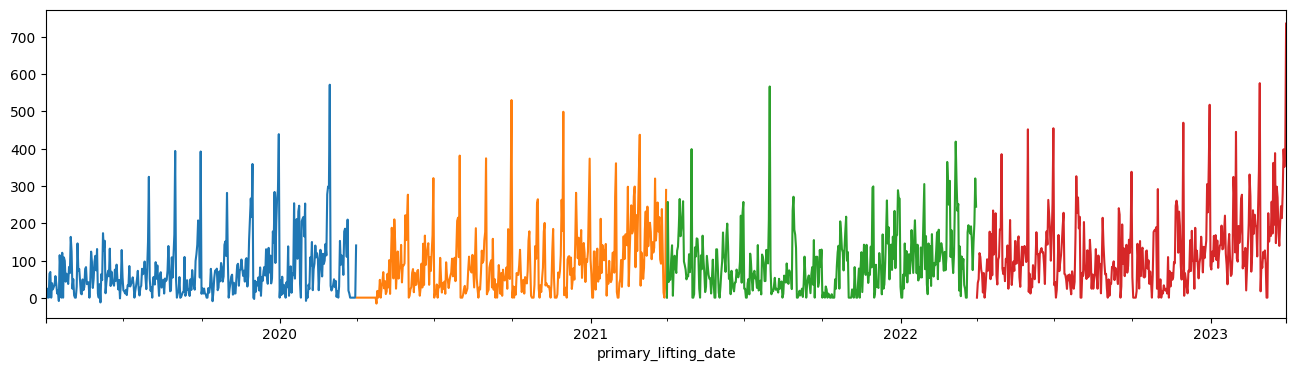

In [271]:
# Plotting the data after slicing a time period 
df1['primary_lifting']['2019-04-01':'2020-03-31'].plot(figsize=(16,4));
df1['primary_lifting']['2020-04-01':'2021-03-31'].plot(figsize=(16,4));
df1['primary_lifting']['2021-04-01':'2022-03-31'].plot(figsize=(16,4));
df1['primary_lifting']['2022-04-01':'2023-03-31'].plot(figsize=(16,4));

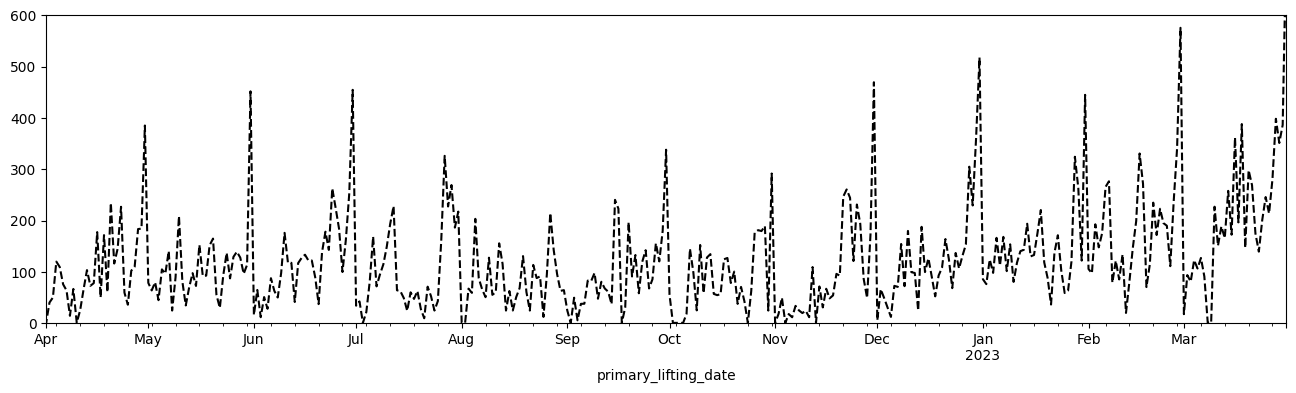

In [272]:
# we can set this date slicing argumen inside x axis limitation as well , xlim arguments , and a range can be given into ylim for showcasing the lifting value in a given range 
# ls and c is used for line style and colour formatting
df1['primary_lifting'].plot(figsize=(16,4),xlim=['2022-04-01','2023-03-31'],ylim=[0,600],ls='--',c='black');

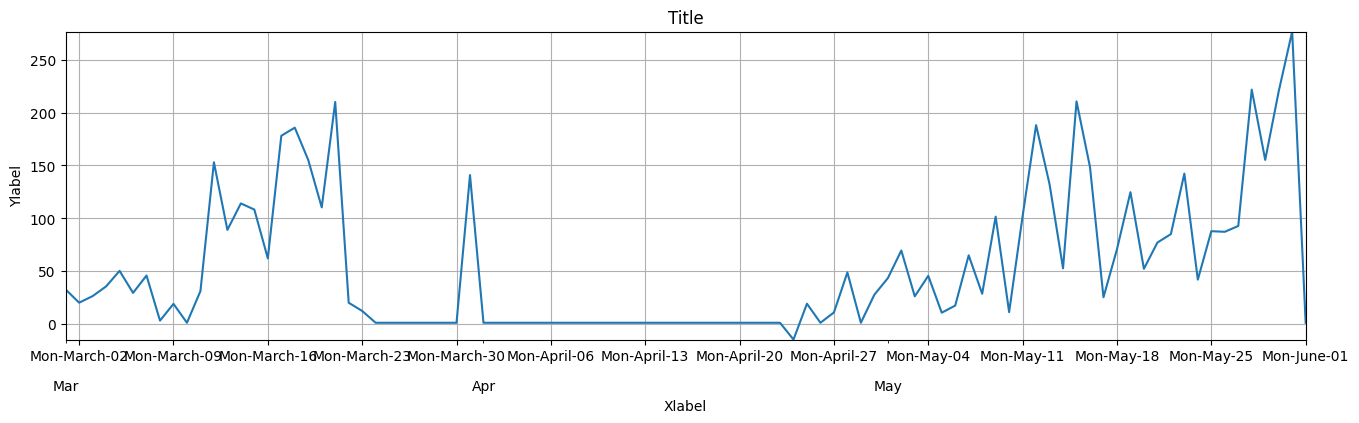

In [273]:
# Marking xticks using locators , suppose xticks need to re structured based on weeks , we can use the locator as below
from matplotlib import dates
ax = df1['primary_lifting']['2020-03-01':'2020-06-01'].plot(figsize=(16,4),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
''' setting formatter to make xticks more explainable '''
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

''' setting month locator as minor locator and minor formatter ''' 
ax.xaxis.set_minor_locator(dates.MonthLocator())
''' using \n to put xticks in multiple lines '''
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

''' setting up grids  ''' 
ax.yaxis.grid(True)
ax.xaxis.grid(True)

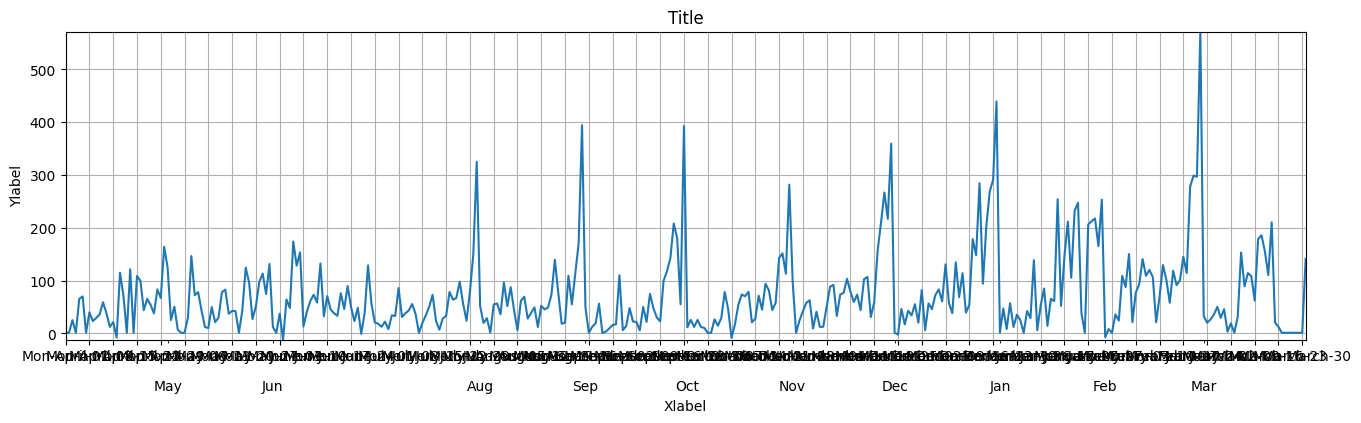

In [274]:
# checking year on year / Mom data points for lifting 
ax = df1['primary_lifting']['2019-04-01':'2020-03-31'].plot(figsize=(16,4),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
''' setting formatter to make xticks more explainable '''
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

''' setting month locator as minor locator and minor formatter ''' 
ax.xaxis.set_minor_locator(dates.MonthLocator())
''' using \n to put xticks in multiple lines '''
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))


''' setting up grids  ''' 
ax.yaxis.grid(True)
ax.xaxis.grid(True)


##### Stat Constants

     

#### StatsModels

    Components of time series are primarily as below -
    Trends
        -   Upward
        -   Horizontal/Stationary
        -   Downward
    Seasonality 
        -   Repeating Trends
    Cyclical
        -   Trends with no set repetition , it may or may not repeat on a given specific period


#### Hodrick-Prescott filter
    
    It separates time series (Y_t) into a trend component (T_t) and a cyclical component (C_t)
    -   Yt = Tt+Ct 
    In this filter Lambda constant is used as a smoothing parameter and the components discussed above are determined by minimizing the quadratic loss function.
        - The lambda value handles the variation in the growth rate of the trend component
        - Quarterly Data analyzing - Default Lambda 1600
        - Annual Data analyzing - Default Lambda 6.25 
        - Monthly Data analyzing - Default Lambda 129600

In [275]:
#Library Importing 
import numpy as np 
import pandas as pd 
%matplotlib inline

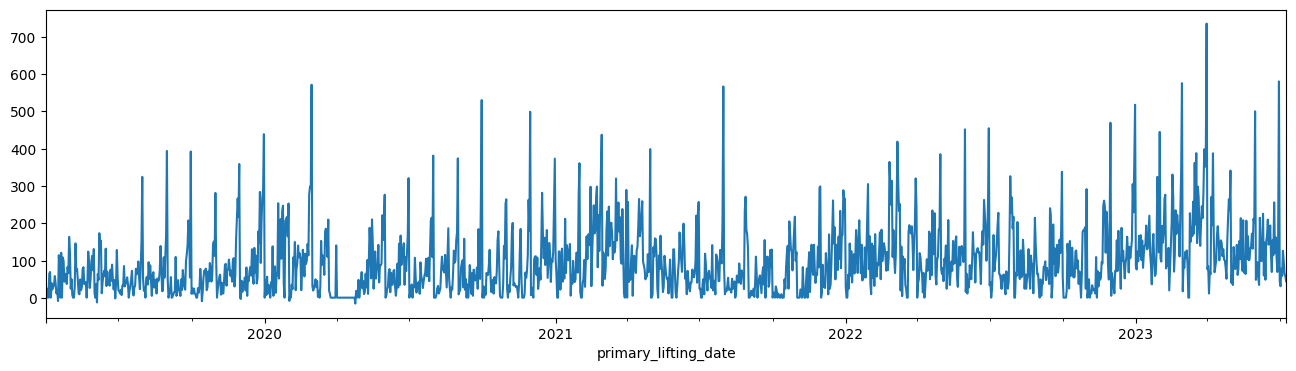

In [276]:
df1['primary_lifting'].plot(figsize=(16,4));

In [277]:
''' Using HP filter with statsmodels ''' 
# importing hpfilter module
from statsmodels.tsa.filters.hp_filter import hpfilter
# Now we will use the HP filter and will get two tuple outputs , cyclical and trend component in our data 
ts_cycle , ts_trend = hpfilter(df1['primary_lifting'],lamb=1600)

In [278]:
# Now let's go ahead assign these cycle and trend component into our main dataframe and plot the same
df2 = df1.copy()
df2['cycle'] = ts_cycle
df2['trend'] = ts_trend
df2.head()

,primary_lifting,cycle,trend
primary_lifting_date,,,
2019-04-01,1.00,-13.258407,14.258407
2019-04-02,1.00,-15.834822,16.834822
2019-04-03,25.05,5.647049,19.402951
2019-04-04,1.00,-20.944610,21.944610
2019-04-05,65.21,40.764854,24.445146


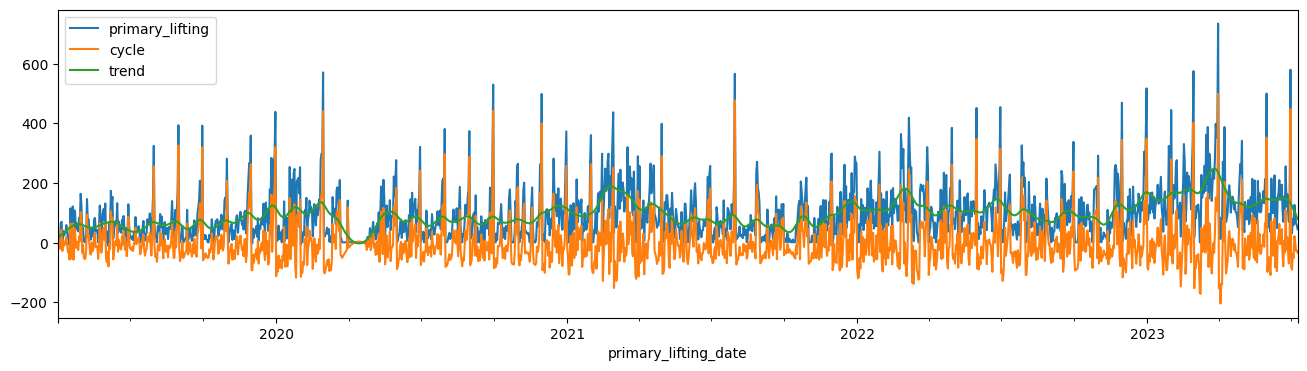

In [279]:
df2[['primary_lifting','cycle','trend']].plot(figsize=(16,4));

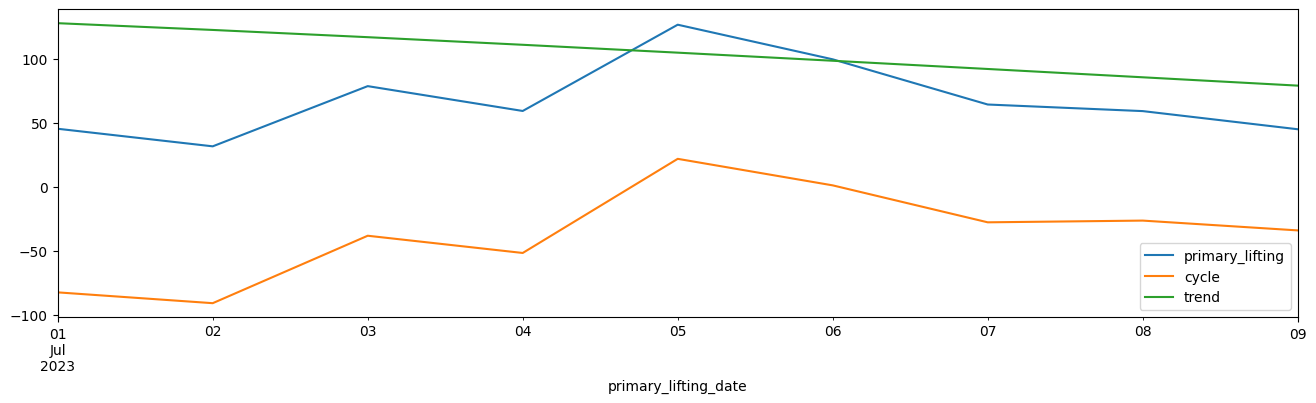

In [280]:
# Checking of these two components on a specific time period 
df2[['primary_lifting','cycle','trend']]['2023-07-01':].plot(figsize=(16,4));

##### ETS Models (Error-Trend-Seasonality)

    -   Exponential Smoothing
    -   Trend Method Models
    -   ETS Decomposition


    ETS Decomposition - Time series decomposition with ETS , ETS decomposition must not contain any missing value

    As an output of these decomposition we get 4 sections 
    
        -   Observed - The original movement
        -   Trend - The Trend movement
        -   Seasonal - Seasonal Movements
        -   Residual - Anything else which can't be explained with trend or seasonal movement

    ETS decomposition has two type of models

        - Additive - when the trend is likely Linear and seasonality and trend components seems to be constant over time. eg : every month lifting is increased by 200 MT
        - Multiplicative - when the trend is likely Non Linear and seasonality and trend components seems to be not constant over time. eg : every month lifting is increasing differently , june it increased by 200 MT , July by 300 the August decreased by 150 MT

In [281]:
# importing ETS decomposition module
from statsmodels.tsa.seasonal import seasonal_decompose

In [282]:
# let's check for missing values
df3 = df1.copy()
df3.isnull().sum()

primary_lifting    0
dtype: int64

In [283]:
# we will use a multiplicative model as our data as we checked has non linear trend and non constant seasonality 
# we will check for zero and negative values in our data as these values doesn't work with multiplicative mnodel 
df3[df3['primary_lifting'] <0]

,primary_lifting
primary_lifting_date,
2019-04-16,-8.005
2019-06-04,-11.834
2019-06-27,-0.970
2019-10-14,-8.525
2019-12-02,-2.495
2020-02-01,-7.627
2020-04-24,-14.900


In [284]:
# although it can be dropped as 0 and negative values are less in number for our data , we will remove the negative values here by taking their absolute values in our data 
df3['primary_lifting'] = abs(df3['primary_lifting'])
df3[df3['primary_lifting'] <0]

,primary_lifting
primary_lifting_date,


In [285]:
# Now we will perform decomposition and  store the result in a variable called result 
result = seasonal_decompose(df3['primary_lifting'],model='multiplicative')

In [286]:
# setting default plot size 
from pylab import  rcParams
rcParams['figure.figsize'] = 16,5

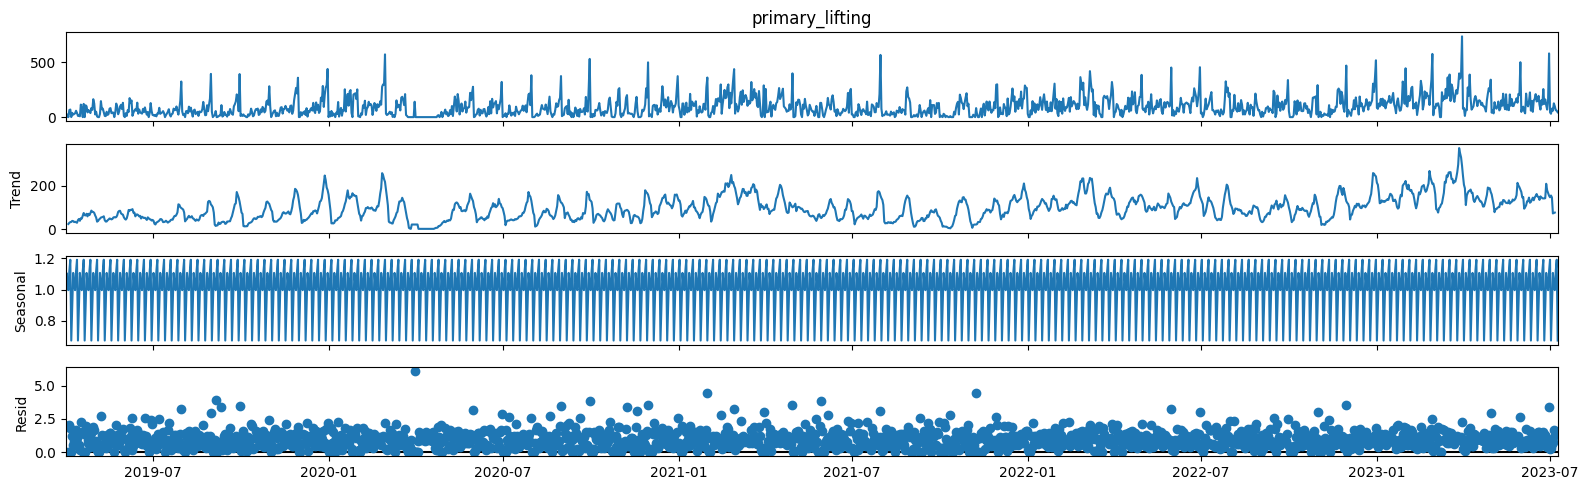

In [287]:
# let's plot the result 
result.plot();

In [288]:
# Let's add all of these to our current dataframe and plot it 
df3['trend'] = result.trend 
df3['seasonality'] = result.seasonal 
df3['noise'] = result.resid

In [289]:
df3.head()

,primary_lifting,trend,seasonality,noise
primary_lifting_date,,,,
2019-04-01,1.00,NaN,0.885788,NaN
2019-04-02,1.00,NaN,1.107249,NaN
2019-04-03,25.05,NaN,1.026064,NaN
2019-04-04,1.00,23.439286,0.996614,0.042808
2019-04-05,65.21,28.962143,1.119010,2.012100


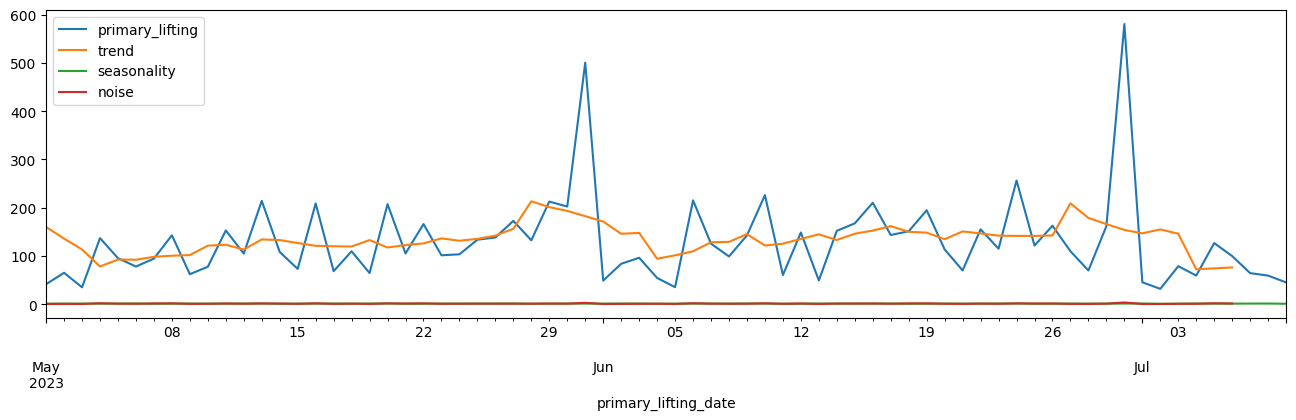

In [290]:
df3[['primary_lifting','trend','seasonality','noise']]['2023-05-01':].plot(figsize=(16,4));

#### EWMA - Exponentially Weighted Moving Average Models

Let's understand why we need EWMA, well at first when we constructed plots with moving averagres , we have taken the same window size for all data points present in our data , to overcome this we use EWMA. EWMA puts on more weightage on recent data and comparetively puts on lesser weightage for older data points. The amount of weightage given to most recent values will depend on actual parameters used in EWMA and the number of periods given in a window size.


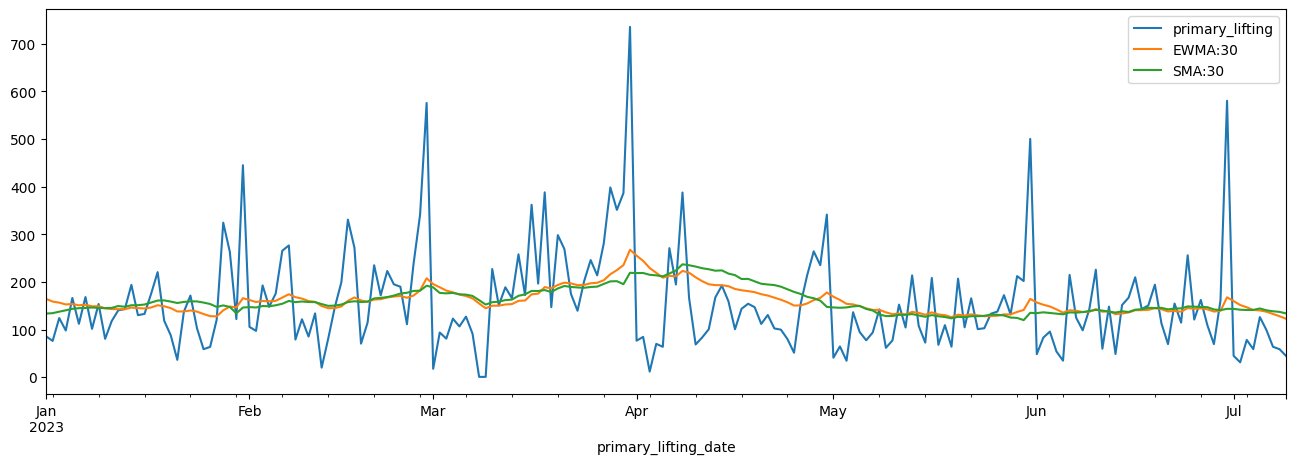

In [291]:
# We will now compare SMA with EWMA for a 30 day window for the current year
df4 = df3.copy()
df4['SMA:30'] = df4['primary_lifting'].rolling(window=30).mean()
df4['EWMA:30'] = df4['primary_lifting'].ewm(span=30).mean()
df4[['primary_lifting','EWMA:30','SMA:30']]['2023-01-01':].plot()
plt.show()


#### Holt - Winters Method (Double EWMA)

With EWMA only weightage of the data points comes into consideration , trend , seasonality etc are not considered. For this we use Holt-Winters Method. This method comprises 4 equations -

    -   Forecasting Equation
    -   Smoothing Equation
        -   Level Smoothing -  smoothing parameter \Alpha
        -   Trend Smoothing - smoothing parameter \Beta
        -   Seasonal Smoothing - smoothing parameter \Gamma

In [292]:
#Checking Frequency
df5 = df4.copy()
df5.index

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10',
               ...
               '2023-06-30', '2023-07-01', '2023-07-02', '2023-07-03',
               '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
               '2023-07-08', '2023-07-09'],
              dtype='datetime64[ns]', name='primary_lifting_date', length=1561, freq=None)

In [293]:
#set frequency with offset aliases for each type of frequency , we will use daily here 
df5.index.freq = 'D'

In [294]:
# implementing holt winters method 
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing
# setting up spand and alpha 
span = 30 
alpha = 2/(span+1)

In [295]:
df5.head()

,primary_lifting,trend,seasonality,noise,SMA:30,EWMA:30
primary_lifting_date,,,,,,
2019-04-01,1.00,NaN,0.885788,NaN,NaN,1.000000
2019-04-02,1.00,NaN,1.107249,NaN,NaN,1.000000
2019-04-03,25.05,NaN,1.026064,NaN,NaN,9.556849
2019-04-04,1.00,23.439286,0.996614,0.042808,NaN,7.199126
2019-04-05,65.21,28.962143,1.119010,2.012100,NaN,20.398004


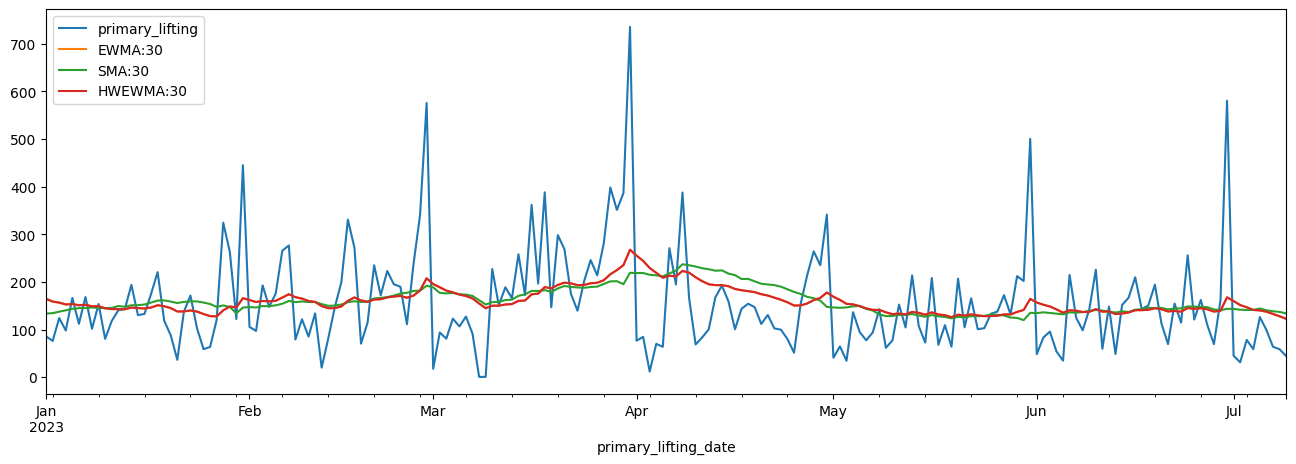

In [296]:
df4['HWEWMA:30'] = df5['primary_lifting'].ewm(alpha=alpha,adjust=False).mean()
df4[['primary_lifting','EWMA:30','SMA:30','HWEWMA:30']]['2023-01-01':].plot()
plt.show()

In [297]:
# Now we will perform The above operation with fewer lines of code
model = SimpleExpSmoothing(df4['primary_lifting'])
fitted_model = model.fit(smoothing_level = alpha,optimized = False)
fitted_model.fittedvalues

primary_lifting_date
2019-04-01      1.000000
2019-04-02      1.000000
2019-04-03      1.000000
2019-04-04      2.551613
2019-04-05      2.451509
                 ...    
2023-07-05    141.416725
2023-07-06    140.453388
2023-07-07    137.809298
2023-07-08    133.060634
2023-07-09    128.286722
Freq: D, Length: 1561, dtype: float64

In [298]:
# let's compare , shift is used here so that the datapoints starts rflecting after first occurence
df4['SEWMA:30'] = fitted_model.fittedvalues.shift(-1)
df4.head(10)

,primary_lifting,trend,seasonality,noise,SMA:30,EWMA:30,HWEWMA:30,SEWMA:30
primary_lifting_date,,,,,,,,
2019-04-01,1.000,NaN,0.885788,NaN,NaN,1.000000,1.000000,1.000000
2019-04-02,1.000,NaN,1.107249,NaN,NaN,1.000000,1.000000,1.000000
2019-04-03,25.050,NaN,1.026064,NaN,NaN,9.556849,2.551613,2.551613
2019-04-04,1.000,23.439286,0.996614,0.042808,NaN,7.199126,2.451509,2.451509
2019-04-05,65.210,28.962143,1.119010,2.012100,NaN,20.398004,6.500444,6.500444
2019-04-06,69.815,32.121429,1.191678,1.823875,NaN,30.065661,10.585254,10.585254
2019-04-07,1.000,32.695000,0.673598,0.045406,NaN,25.038565,9.966850,9.966850
2019-04-08,39.660,37.670714,0.885788,1.188555,NaN,27.320034,11.882537,11.882537
2019-04-09,23.115,36.745000,1.107249,0.568133,NaN,26.718913,12.607212,12.607212


In [310]:
# Implementing double exponential smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# double exponential , mul for multiplicative  model
df4['DES_mul30:'] = ExponentialSmoothing(df4['primary_lifting'],trend ='mul',seasonal='mul').fit().fittedvalues.shift(-1)


c:\Users\chandan.sengupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [311]:
df4.head(10)

,primary_lifting,trend,seasonality,noise,SMA:30,EWMA:30,HWEWMA:30,SEWMA:30,DES_mul30:
primary_lifting_date,,,,,,,,,
2019-04-01,1.000,NaN,0.885788,NaN,NaN,1.000000,1.000000,1.000000,43.106337
2019-04-02,1.000,NaN,1.107249,NaN,NaN,1.000000,1.000000,1.000000,36.277718
2019-04-03,25.050,NaN,1.026064,NaN,NaN,9.556849,2.551613,2.551613,38.589846
2019-04-04,1.000,23.439286,0.996614,0.042808,NaN,7.199126,2.451509,2.451509,42.324852
2019-04-05,65.210,28.962143,1.119010,2.012100,NaN,20.398004,6.500444,6.500444,51.143834
2019-04-06,69.815,32.121429,1.191678,1.823875,NaN,30.065661,10.585254,10.585254,41.669307
2019-04-07,1.000,32.695000,0.673598,0.045406,NaN,25.038565,9.966850,9.966850,38.185239
2019-04-08,39.660,37.670714,0.885788,1.188555,NaN,27.320034,11.882537,11.882537,39.112333
2019-04-09,23.115,36.745000,1.107249,0.568133,NaN,26.718913,12.607212,12.607212,35.208716


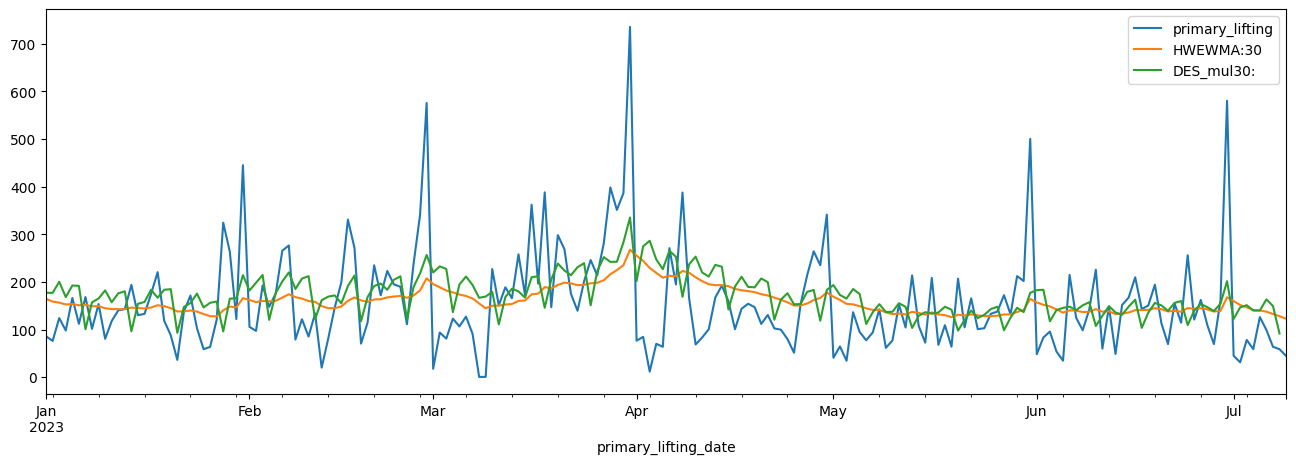

In [312]:
# Now let's plot
df4[['primary_lifting','HWEWMA:30','DES_mul30:']]['2023-01-01':].plot()
plt.show()